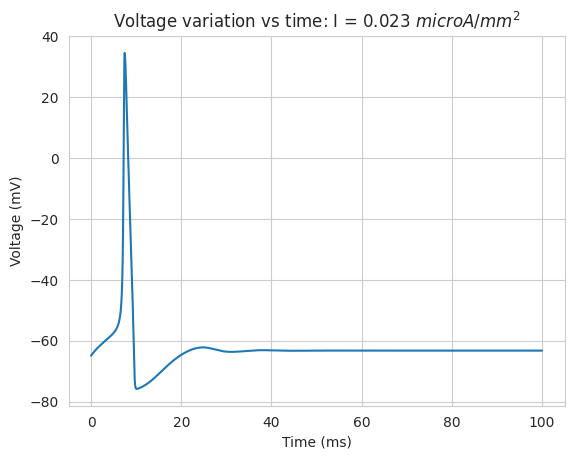

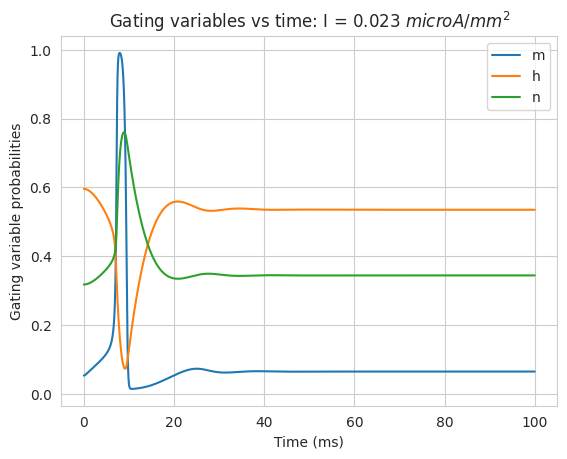

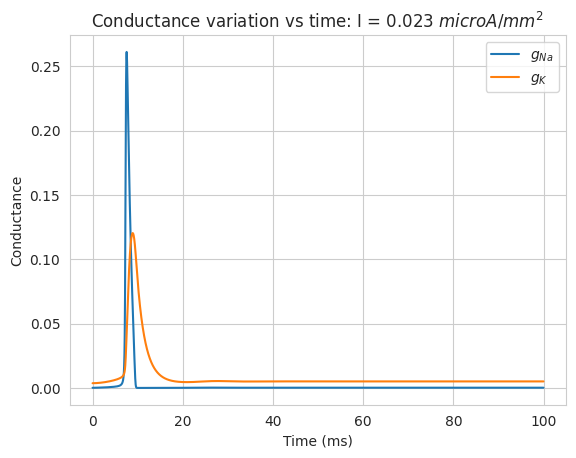

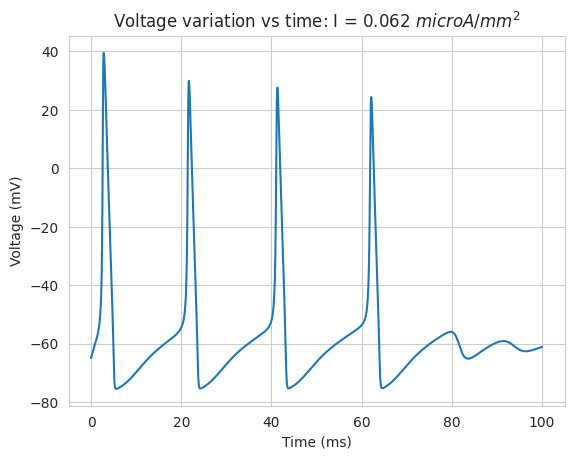

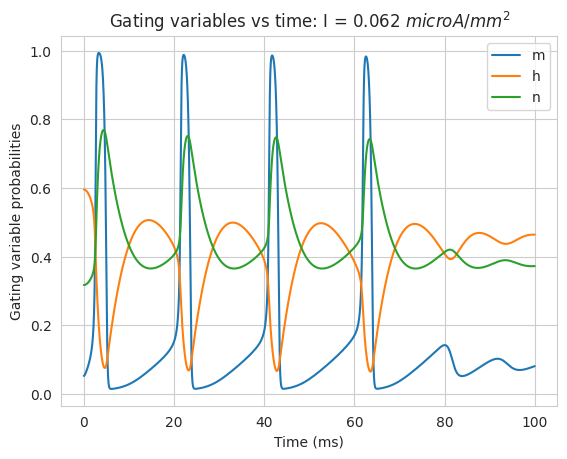

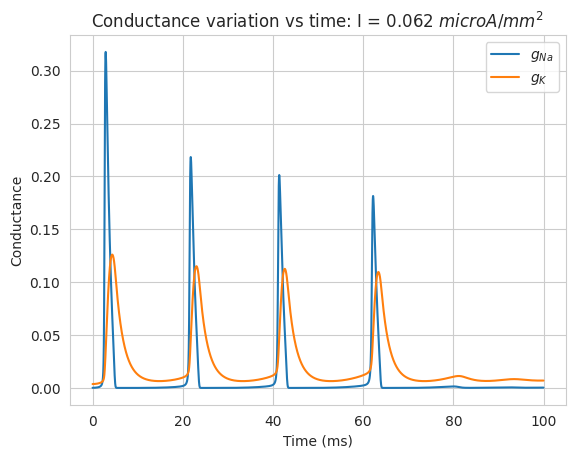

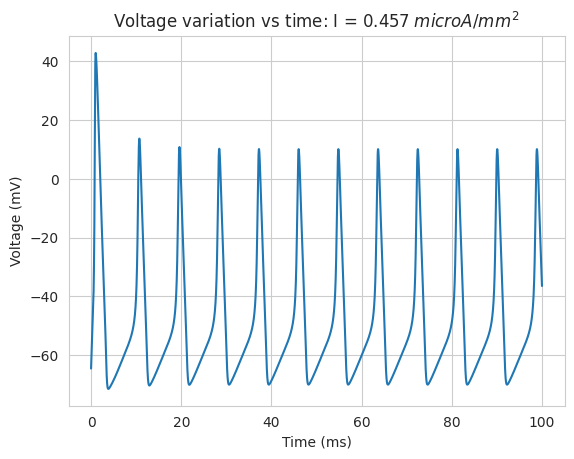

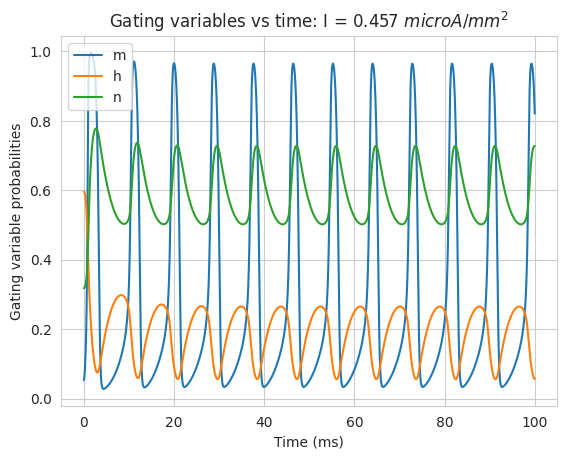

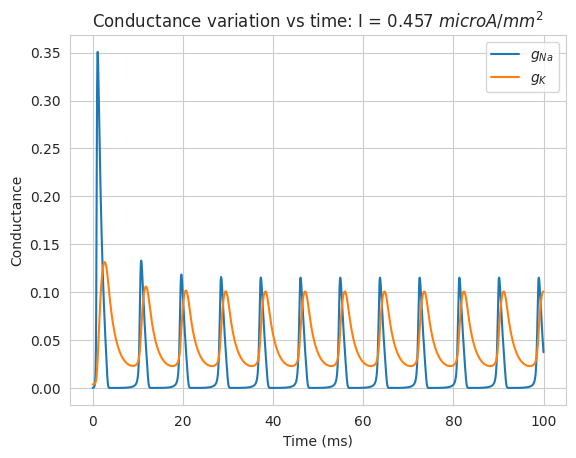

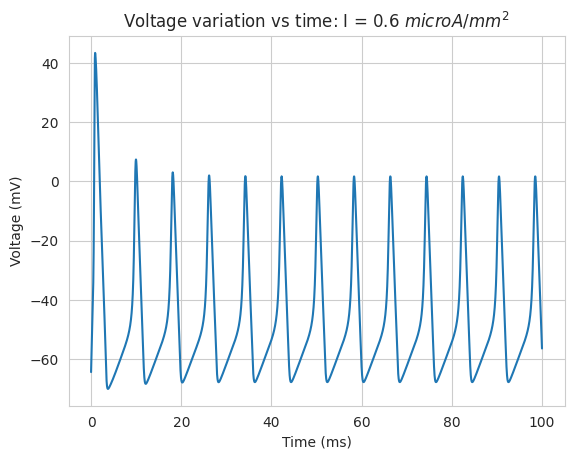

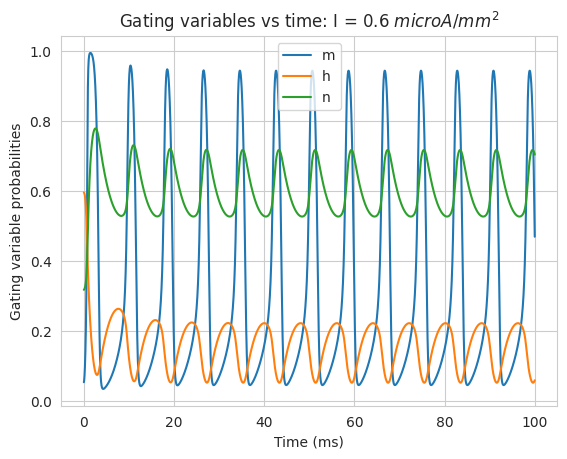

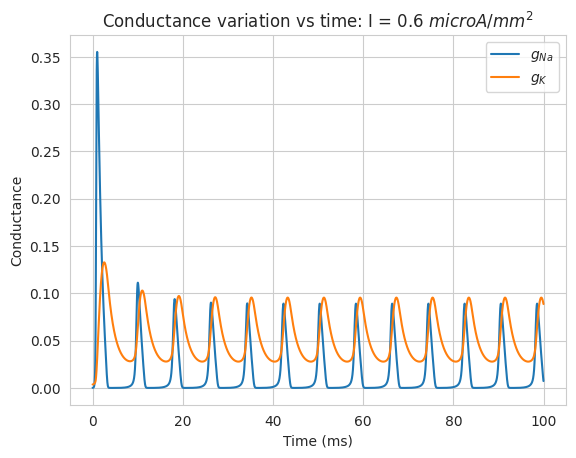

In [ ]:
import sys
import numpy as np
from math import exp
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

current_range = [0.023, 0.062, 0.457, 0.6] #current ranges for I1, I2, I3 and post I3
for cur_iter in range(len(current_range)):
	gkmax = 0.36
	vk = -77
	gnamax = 1.20
	vna = 50
	gl = 0.003
	vl = -54.387
	cm = 0.01

	dt = 0.01
	niter = 10000
	t = np.arange(0,niter)*dt

	v = -64.9964
	m = 0.0530
	h = 0.5960
	n = 0.3177

	gnahist = np.zeros((niter))
	gkhist = np.zeros((niter))
	vhist = np.zeros((niter))
	mhist = np.zeros((niter))
	hhist = np.zeros((niter))
	nhist = np.zeros((niter))


	for iteration in range(niter):
		gna = gnamax*m**3*h
		gk = gkmax*n**4
		gtot = gna+gk+gl
		vinf = ((gna*vna+gk*vk+gl*vl) + current_range[cur_iter])/gtot
		tauv = cm/gtot

		v = vinf+(v-vinf)*exp(-dt/tauv)

		alpham = 0.1*(v+40)/(1-exp(-(v+40)/10))
		betam = 4*exp(-0.0556*(v+65))

		alphan = 0.01*(v+55)/(1-exp(-(v+55)/10))
		betan = 0.125*exp(-(v+65)/80)

		alphah = 0.07*exp(-0.05*(v+65))
		betah = 1/(1+exp(-0.1*(v+35)))

		taum = 1/(alpham+betam)
		tauh = 1/(alphah+betah)
		taun = 1/(alphan+betan)

		minf = alpham*taum
		hinf = alphah*tauh
		ninf = alphan*taun

		m = minf+(m-minf)*exp(-dt/taum)
		h = hinf+(h-hinf)*exp(-dt/tauh)
		n = ninf+(n-ninf)*exp(-dt/taun)

		vhist[iteration] = v
		mhist[iteration] = m
		hhist[iteration] = h
		nhist[iteration] = n

	plt.figure()
	plt.plot(t, vhist)
	string = "Voltage variation vs time: I = " + str(current_range[cur_iter]) + " $microA/mm^{2}$"
	plt.title(string)
	plt.xlabel("Time (ms)")
	plt.ylabel("Voltage (mV)")


	plt.figure()
	plt.plot(t, mhist)
	plt.plot(t, hhist)
	plt.plot(t, nhist)
	plt.legend(['m','h','n'])
	string = "Gating variables vs time: I = " + str(current_range[cur_iter]) + " $microA/mm^{2}$"
	plt.title(string)
	plt.xlabel("Time (ms)")
	plt.ylabel("Gating variable probabilities")

	plt.figure()
	gna = gnamax*(mhist**3)	*hhist
	gk = gkmax*nhist**4
	plt.plot(t, gna)
	plt.plot(t, gk)
	plt.legend(['$g_{Na}$','$g_K$'])
	string = "Conductance variation vs time: I = " + str(current_range[cur_iter]) + " $microA/mm^{2}$"
	plt.title(string)
	plt.xlabel("Time (ms)")
	plt.ylabel("Conductance")


plt.show()

100%|██████████| 600/600 [04:29<00:00,  2.22it/s]



The cutoff currents are as follows:
I1 = 0.023 microA/mm^2
I2 = 0.062 microA/mm^2
I3 = 0.457 microA/mm^2


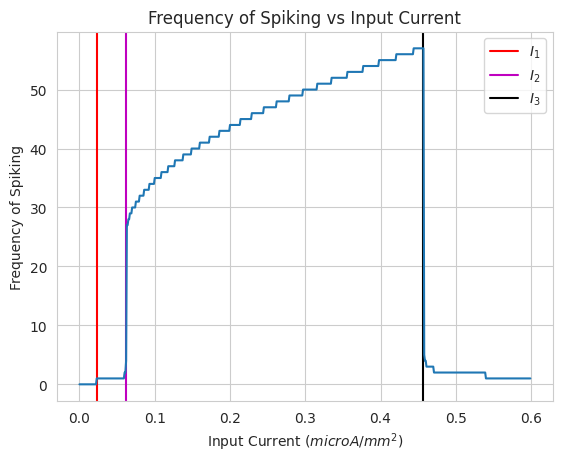